<a href="https://colab.research.google.com/github/GautamaShastry/brain_tumor-classification/blob/main/brain_tumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import models, layers

In [19]:
## constants
IMAGE_SIZE = 256
BATCH_SIZE = 32

In [20]:
## loading the datasets

train_df = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Deep Learning Projects/Brain Tumor/Training',
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

test_df = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Deep Learning Projects/Brain Tumor/Testing',
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2870 files belonging to 4 classes.
Found 394 files belonging to 4 classes.


In [21]:
class_names = train_df.class_names
class_names

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

In [22]:
len(train_df)

90

In [23]:
for image_batch, label_batch in train_df.take(1):
  print(image_batch.shape)
  print(label_batch.numpy())

(32, 256, 256, 3)
[3 3 3 1 2 2 0 3 3 0 1 1 0 0 0 0 0 3 3 0 3 0 3 3 0 0 3 0 2 3 0 1]


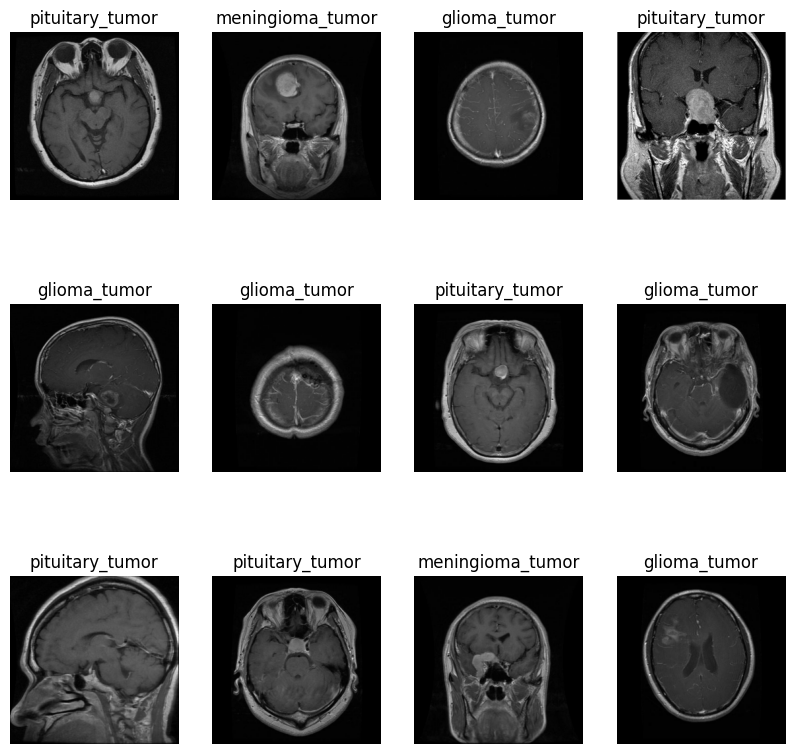

In [24]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in train_df.take(1):
  for i in range(12):
    ax=plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype('uint8'))
    plt.title(class_names[label_batch[i]])
    plt.axis('off')

In [25]:
## Normalise the image dataset
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_df = train_df.map(process)
test_df = test_df.map(process)

In [26]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Flatten

In [27]:
## implement cnn

model = Sequential()

model.add(Conv2D(32,(3,3),padding='valid',activation='relu',input_shape=(IMAGE_SIZE,IMAGE_SIZE,3)))
model.add(MaxPooling2D((2,2),strides=2,padding='valid'))

model.add(Conv2D(64,(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D((2,2),strides=2,padding='valid'))

model.add(Conv2D(128,(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D((2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(4,activation='softmax'))

In [28]:
## compile the model
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [29]:
#early stopping
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.01,
    patience=20,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [30]:
valid_df = train_df.take(int(0.2 * len(train_df)))

In [31]:
history = model.fit(train_df, validation_data=valid_df, epochs=100,batch_size=BATCH_SIZE ,callbacks=early_stopping)

Epoch 1/100
90/90 [==============================] - 17s 150ms/step - loss: 1.1319 - accuracy: 0.4763 - val_loss: 0.8764 - val_accuracy: 0.5990
Epoch 2/100
90/90 [==============================] - 14s 155ms/step - loss: 0.8597 - accuracy: 0.5889 - val_loss: 0.5924 - val_accuracy: 0.7726
Epoch 3/100
90/90 [==============================] - 14s 153ms/step - loss: 0.7069 - accuracy: 0.6770 - val_loss: 0.4757 - val_accuracy: 0.8073
Epoch 4/100
90/90 [==============================] - 12s 132ms/step - loss: 0.5656 - accuracy: 0.7456 - val_loss: 0.3540 - val_accuracy: 0.8611
Epoch 5/100
90/90 [==============================] - 12s 130ms/step - loss: 0.4692 - accuracy: 0.8014 - val_loss: 0.2567 - val_accuracy: 0.8976
Epoch 6/100
90/90 [==============================] - 12s 132ms/step - loss: 0.3845 - accuracy: 0.8380 - val_loss: 0.1909 - val_accuracy: 0.9253
Epoch 7/100
90/90 [==============================] - 12s 129ms/step - loss: 0.3295 - accuracy: 0.8540 - val_loss: 0.1328 - val_accuracy:

In [32]:
scores = model.evaluate(test_df)

13/13 [==============================] - 120s 3s/step - loss: 2.5868 - accuracy: 0.7056


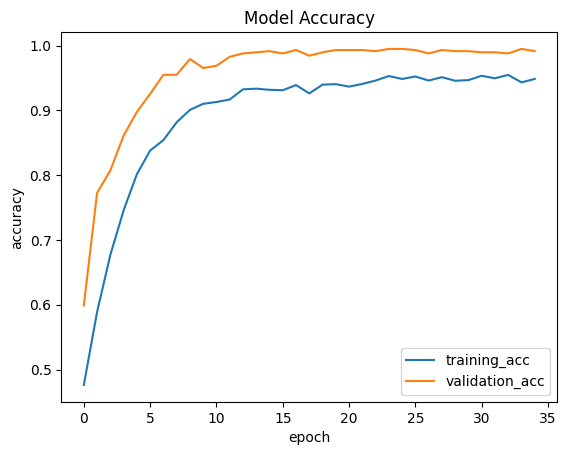

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['training_acc','validation_acc'])
plt.show()

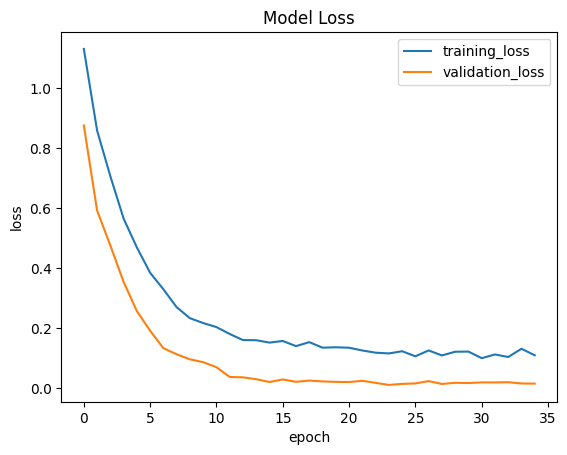

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training_loss','validation_loss'])
plt.show()

In [35]:
model.save('brain_tumor.h5')

The first image to be predicted
The label is pituitary_tumor
1/1 [==============================] - 0s 143ms/step
The predicted label is: pituitary_tumor


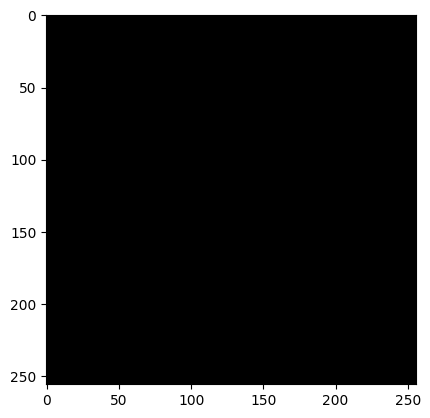

In [36]:
for image_batch, label_batch in test_df.take(1):
    first_image=image_batch[0].numpy().astype('uint8')
    first_label= label_batch[0].numpy()
    print('The first image to be predicted')
    print(f'The label is {class_names[first_label]}')
    plt.imshow(first_image)
    batch_prediction=model.predict(image_batch)
    print(f'The predicted label is: {class_names[np.argmax(batch_prediction[0])]}')

In [37]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 20ms/step


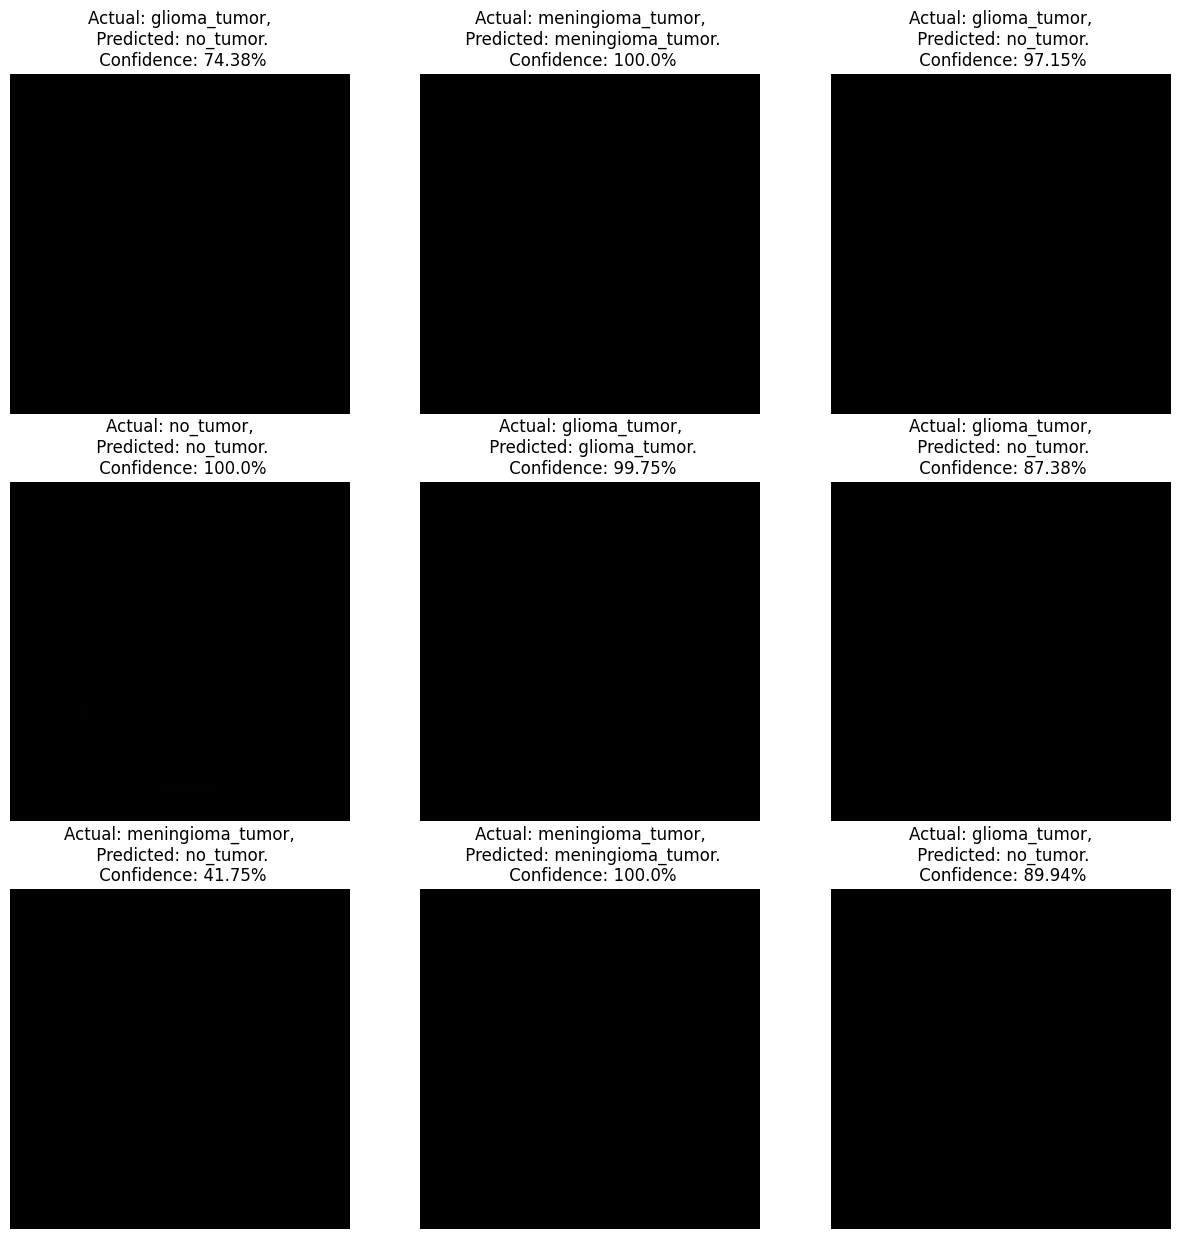

In [39]:
plt.figure(figsize=(15, 15))
for images, labels in test_df.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")